In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Задание 1

1. Сгенерируйте одну выборку размера 1000 и другую выборку размера 10 из нормально распределенной генеральной совокупности с СИЛЬНО отличающимся средним.

In [19]:
sample_1 = np.random.normal(loc = 10, size = 1000)
sample_2 = np.random.normal(loc = 100, size = 10)

2. Посчитайте для объединенной выборки среднее и медиану, постройте диаграмму «Ящик с усами».

In [20]:
sample = np.concatenate([sample_1, sample_2])

## Задание 2

1. Из нормально распределенной генеральной совокупности сгенерировать по 1000 раз выборки разного объема N (не менее трёх значений N). 

In [21]:
samples = np.random.normal(scale = 5, size = (1000, 10))

2. Для каждой выборки посчитать дисперсию и исправленную дисперсию.

In [22]:
var_10 = [np.var(sample) for sample in samples]
cor_var_10 = [np.var(sample, ddof=1) for sample in samples]

3. Для каждого N построить диаграмму «Ящик с усами» для двух дисперсий. Отметить на графике истинное значение дисперсии (с которым моделировали выборку). 

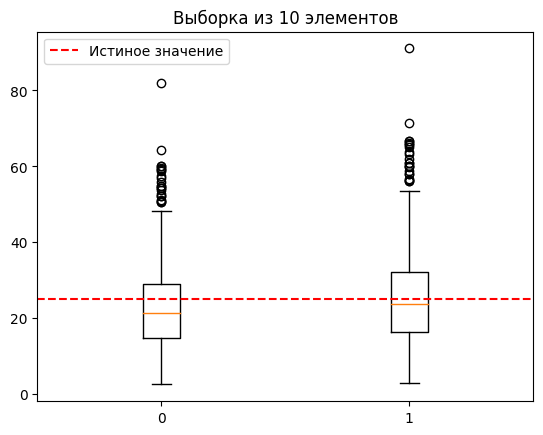

In [23]:
plt.boxplot([var_10, cor_var_10], positions = [0, 1])
plt.axhline(y = 25, color='red', label='Истиное значение', linestyle='--')
plt.title('Выборка из 10 элементов')
plt.legend()
plt.show()

4. Построить следующие графики плотности нормального распределения:
- с заданным мат. ожиданием и заданной дисперсией, 
- заданным мат. ожиданием и выборочной дисперсией (средней по выборке из 1000 дисперсий), 
- заданным мат. ожиданием и исправленной выборочной дисперсией (средней по выборке). 

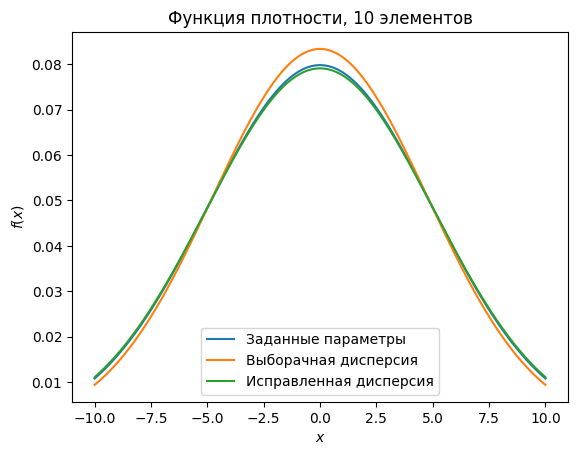

In [24]:
normal_distribution = stats.norm(loc=0, scale=5)

x = np.linspace(-10, 10, 1000)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf, label='Заданные параметры')

normal_distribution = stats.norm(loc=0, scale=np.mean(var_10)**0.5)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf, label='Выборачная дисперсия')

normal_distribution = stats.norm(loc=0, scale=np.mean(cor_var_10)**0.5)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf, label='Исправленная дисперсия')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Функция плотности, 10 элементов')
plt.legend()
plt.show()

## Задание 3

1. Смоделируйте выборку размера N=50. 
2. Постройте 95% доверительный интервал для среднего.

In [25]:
sigma, mean = 1, 5
N = 50

sample = np.random.normal(loc=mean, scale=sigma, size=N)

mean_of_sample = np.mean(sample)
sigma_of_mean = stats.sem(sample)

In [26]:
interval = stats.norm.interval(confidence=0.95, loc = mean_of_sample, scale = sigma_of_mean)
# %f: для вывода чисел с плавающей точкой
# 4" - ширина поля (для вывода числа будут использоваться 4 цифры), а "2" - точность (2 цифры в дробной части).
print('Доверительный интервал [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))

Доверительный интервал [4.77; 5.26]


3. Посмотрите, как меняется доверительный интервал в зависимости от размера выборки, дисперсии и уровня значимости (99%, 95%, 90% доверительные интервалы). 

In [27]:
sample = np.random.normal(loc=mean, scale=sigma, size=100)
mean_of_sample = np.mean(sample)
sigma_of_mean = stats.sem(sample)
interval = stats.norm.interval(confidence=0.95, loc = mean_of_sample, scale = sigma_of_mean)
print('Доверительный интервал [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))

Доверительный интервал [4.85; 5.24]


In [28]:
sample = np.random.normal(loc=mean, scale=5, size=100)
mean_of_sample = np.mean(sample)
sigma_of_mean = stats.sem(sample)
interval = stats.norm.interval(confidence=0.95, loc = mean_of_sample, scale = sigma_of_mean)
print('Доверительный интервал [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))

Доверительный интервал [4.25; 6.30]


In [29]:
sample = np.random.normal(loc=mean, scale=sigma, size=100)
mean_of_sample = np.mean(sample)
sigma_of_mean = stats.sem(sample)
interval = stats.norm.interval(confidence=0.99, loc = mean_of_sample, scale = sigma_of_mean)
print('Доверительный интервал [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))

Доверительный интервал [4.76; 5.23]


4. Для сравнения полученных по выборке интервалов с настоящим: 1000 раз смоделируйте выборку размера N=50, посчитайте среднее. Постройте по полученной выборке средних доверительный интервал, сравните результаты. Увеличьте размер выборки.

In [30]:
samples = np.random.normal(loc=mean, scale=sigma, size=(1000, 50))
samples_means = [np.mean(sample) for sample in samples]

In [31]:
mean_of_sample = np.mean(samples_means)
sigma_of_mean = stats.sem(samples_means)

In [32]:
prob = 0.95
interval = stats.norm.interval(confidence=prob, loc = mean_of_sample, scale = sigma_of_mean)
print('Доверительный интервал [{:4.2f}; {:4.2f}]'.format(interval[0],interval[1]))

Доверительный интервал [4.99; 5.01]
